In [1]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
from pylab import figure, axes, pie, title, show
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import pylab

In [2]:
cd C:\Users\Charles\Desktop\AI Cough Detection\Cough

C:\users\charles\desktop\AI Cough Detection\cough


1    40
Name: label, dtype: int64

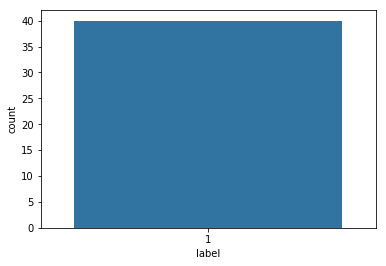

In [19]:
# Class Distribution
df_data = pd.read_csv('cough2_drive.csv')
g = sns.countplot(df_data['label'])
df_data['label'].value_counts()

In [20]:
# define directories
base_dir = "./"
esc_dir = os.path.join(base_dir, "cough")
meta_file = os.path.join(base_dir, "cough2_drive.csv")
audio_dir = os.path.join(base_dir, "cough2_drive/")

In [21]:
# load metadata
meta_data = pd.read_csv(meta_file)
meta_data

,filename,label
0,1-19111-A-24.wav,1
1,1-19118-A-24.wav,1
2,1-30830-A-24.wav,1
3,1-52266-A-24.wav,1
4,1-52323-A-24.wav,1
5,1-53663-A-24.wav,1
6,1-58792-A-24.wav,1
7,1-63679-A-24.wav,1
8,2-108017-A-24.wav,1
9,2-123896-A-24.wav,1


In [22]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

In [23]:
# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [24]:
# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

In [25]:
#display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    #plt.colorbar()
    plt.show()
    #plt.axis('off')

In [26]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [27]:
# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [28]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [29]:
!git init
!git add .
!git commit -m "Initial commit"
!git remote add origin https://github.com/CharlesNJohn/Cough.git
!git push -f origin master

Reinitialized existing Git repository in C:/Users/Charles/Desktop/AI Cough Detection/cough/.git/


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 621b872] Initial commit
 293 files changed, 6542 insertions(+), 2016 deletions(-)
 create mode 100644 .ipynb_checkpoints/Cough-Copy1-checkpoint.ipynb
 rewrite .ipynb_checkpoints/Cough-checkpoint.ipynb (91%)
 create mode 100644 .ipynb_checkpoints/CoughRedundant-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/Untitled-checkpoint.ipynb
 delete mode 100644 44100.png
 create mode 100644 Cough-Copy1.ipynb
 rewrite Cough.ipynb (99%)
 create mode 100644 CoughRedundant.ipynb
 create mode 100644 Untitled.ipynb
 delete mode 100644 [0. 0. 0. ... 0. 0. 0.].png
 create mode 100644 audio_cough only/cough.txt
 create mode 100644 audio_cough only/dirlist.txt
 create mode 100644 audio_cough only/filename.xlsx
 create mode 100644 cough.xlsx
 rename {audio_cough only/cough => cough_downloaded}/108017__erocshadow__cough.wav (100%)
 rename {audio_cough only/cough => cough_downloaded}/132601__carlossolano019__cough.wav (100%)
 rename {audio_cough only/cough => cough_downloaded}/13799__pfly__b

fatal: remote origin already exists.
To https://github.com/CharlesNJohn/Cough.git
   b8ad82f..621b872  master -> master


In [30]:
!git remote -v

origin	https://github.com/CharlesNJohn/Cough.git (fetch)
origin	https://github.com/CharlesNJohn/Cough.git (push)


In [31]:
!git push origin master

Everything up-to-date


In [32]:
!git commit -m "updated"

On branch master
Changes not staged for commit:
	modified:   Cough.ipynb

no changes added to commit


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5


KeyboardInterrupt: 

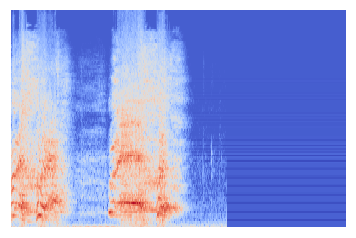

In [35]:
for filename in os.listdir(audio_dir):
    for i in range(0, 40):

            x, fs = load_wave_data(audio_dir, meta_data.loc[i,"filename"])
            melsp = calculate_melsp(x)
            librosa.display.specshow(melsp, sr=fs)
            
            label_sm='SM'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_sm_renamed=os.path.splitext(label_sm)[0]
            plt.axis('off')
            plt.savefig('images/cough2_drive/'+label_sm_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            #show_melsp(melsp, fs)
            
            
            
            '''fig, ax = plt.subplots( nrows=1, ncols=1 ) # create figure & 1 axis
            ax.plot([0,1,2], [10,20,3])
            fig.savefig('o.png') # save the figure to file
            plt.close(fig) # close the figure'''
            
            x_wn = add_white_noise(x)
            melsp = calculate_melsp(x_wn)
            librosa.display.specshow(melsp, sr=fs)
            
            #show_melsp(melsp, fs)
            label_wn='WN'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_wn_renamed=os.path.splitext(label_wn)[0]
            plt.savefig('images/cough2_drive/'+label_wn_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            
            x_ss = shift_sound(x)
            melsp = calculate_melsp(x_ss)
            librosa.display.specshow(melsp, sr=fs)
            
            label_ss='SS'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_ss_renamed=os.path.splitext(label_ss)[0]
            plt.savefig('images/cough2_drive/'+label_ss_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()

            x_st = stretch_sound(x)
            melsp = calculate_melsp(x_st)
            librosa.display.specshow(melsp, sr=fs)
            
            label_st='ST'+str(i)+'-'+meta_data.loc[i,"filename"]
            label_st_renamed=os.path.splitext(label_st)[0]
            plt.savefig('images/cough2_drive/'+label_st_renamed+'.png',bbox_inches=None,pad_inches=0)
            #plt.show()
            
            print(i)

In [ ]:
!pwd